# Portfolio Optimisation Project

In this exciting project, we're diving into the world of investment portfolios, aiming to make the most out of our $10,000 investment. We'll be working with four stocks and constructing two distinct portfolios with different strategies.

## Project Overview

### Portfolio Construction
1. **Data Importation:** Let's kick things off by gathering two years' worth of data for our chosen quartet of stocks.
2. **Equal-Weighted Portfolio:** Our first portfolio will be a straightforward one, with an equal allocation of our $10,000 across all four stocks.

### Analysis and Visualization
3. **Analyzing the Equality:** Once our initial portfolio is set up, it's time to dive into analysis. We'll crunch numbers and visualize the performance of our equal-weighted portfolio.

### Optimization Journey
4. **Random Scenario Generation:** Things get interesting here. We're going to create 10,000 different scenarios, each with a random weighting allocation for our stocks.
5. **Finding the Sweet Spot:** From those 10,000 scenarios, we're on a mission to identify the optimal portfolio. This one is all about maximizing returns while keeping an eye on risk.

### Visualizing Success
6. **Results Visualization:** The final step involves bringing our findings to life. We'll create visualizations to showcase the results of our optimized portfolio and compare it with the initial equal-weighted one.

Let's get in and make those portfolios work for us! 🚀

## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pd.set_option('mode.chained_assignment', None)

In [2]:
# Import yfinance for yahoo data
import yfinance as yf

# Define the stock, start date, and end date
stock_symbols = ['SPY', 'AMD', 'MSFT', 'GOOGL']
startdate = '2019-01-01'
enddate = '2022-01-31'

# Create a dictionary to store DataFrames for each stock symbol
stocks = {}

# Loop through each stock symbol and download the data
for stock_symbol in stock_symbols:
    print(f"Downloading data for {stock_symbol}...")

    # Download the data for the specified stock and date range
    stock_data = yf.download(stock_symbol, start=startdate, end=enddate)

    # Create a DataFrame for the stock and store it in the dictionary
    stocks[stock_symbol] = stock_data[['Adj Close']]

    print(f"Data downloaded for {stock_symbol}. Shape: {stocks[stock_symbol].shape}\n")

# Now, 'stocks' dictionary contains DataFrames for each stock symbol


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data downloaded for SPY. Shape: (776, 1)

Data downloaded for AMD. Shape: (776, 1)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data downloaded for MSFT. Shape: (776, 1)

Data downloaded for GOOGL. Shape: (776, 1)



In [3]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stocks['AMD'].head()

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


## Generate the Equal-Weighted Portfolio
To form the equal-weighted portfolio, it is necessary to introduce supplementary columns to the DataFrames within the stocks collection. The three specific columns we aim to construct are:

* Normalized Return: Calculated as the Adjusted Close divided by the Adjusted Close on the portfolio's initial date.
* Allocation: Determined by multiplying the Normalized Return by 0.25, signifying an equitable distribution of weight among the four stocks.
* Position Value: Computed as the Allocation multiplied by 10,000, reflecting the respective value of each stock within the portfolio.

Calculating these metrics is pivotal for portfolio optimization. The equal-weighted approach helps distribute investments evenly across selected assets, reducing the concentration risk associated with allocating a significant portion of the portfolio to a single stock. By normalizing returns and applying equal weights, the portfolio becomes more diversified, potentially enhancing overall stability and minimizing the impact of individual stock fluctuations. This method aligns with the goal of achieving a balanced and risk-mitigated investment strategy, contributing to a more robust and optimized portfolio.

In [4]:
# Calculate the Normalized Return for each stock
for stock_symbol in stock_symbols:
    first_adj_close = stocks[stock_symbol]['Adj Close'].iloc[0]
    stocks[stock_symbol].loc[:, 'Normalized Return'] = stocks[stock_symbol]['Adj Close'] / first_adj_close

<ipython-input-4-e1d215ac45a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[stock_symbol].loc[:, 'Normalized Return'] = stocks[stock_symbol]['Adj Close'] / first_adj_close
<ipython-input-4-e1d215ac45a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[stock_symbol].loc[:, 'Normalized Return'] = stocks[stock_symbol]['Adj Close'] / first_adj_close


In [5]:
stocks['GOOGL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,52.734001,1.000000
2019-01-03,51.273499,0.972304
2019-01-04,53.903500,1.022177
2019-01-07,53.796001,1.020139
2019-01-08,54.268501,1.029099


In [6]:
# Calculate Allocation for each stock
for stock_symbol in stock_symbols:
    stocks[stock_symbol].loc[:, 'Allocation'] = stocks[stock_symbol]['Normalized Return'] * 0.25

<ipython-input-6-35a8a824cd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[stock_symbol].loc[:, 'Allocation'] = stocks[stock_symbol]['Normalized Return'] * 0.25
<ipython-input-6-35a8a824cd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[stock_symbol].loc[:, 'Allocation'] = stocks[stock_symbol]['Normalized Return'] * 0.25


In [7]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,96.023262,1.000000,0.250000
2019-01-03,92.490768,0.963212,0.240803
2019-01-04,96.792435,1.008010,0.252003
2019-01-07,96.915894,1.009296,0.252324
2019-01-08,97.618591,1.016614,0.254153


In [8]:
# Calculate Position Value for each stock
for stock_symbol in stock_symbols:
    stocks[stock_symbol].loc[:, 'Position Value'] = stocks[stock_symbol]['Allocation'] * 10000

<ipython-input-8-46786210a526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[stock_symbol].loc[:, 'Position Value'] = stocks[stock_symbol]['Allocation'] * 10000


In [9]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,96.023262,1.000000,0.250000,2500.000000
2019-01-03,92.490768,0.963212,0.240803,2408.030265
2019-01-04,96.792435,1.008010,0.252003,2520.025686
2019-01-07,96.915894,1.009296,0.252324,2523.239981
2019-01-08,97.618591,1.016614,0.254153,2541.534969


## Visualizing Portfolio Performance

To get a clear picture of how the portfolio is performing, we'll generate two line charts. The first chart will illustrate the overall portfolio return over time, while the second will focus on the individual stock returns. To facilitate this, we'll construct a fresh DataFrame that exclusively holds the **position value** for each stock and includes the total portfolio value. This DataFrame will serve as the foundation for creating the visual representations.

In [10]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [11]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,SPY,AMD,MSFT,GOOGL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2440.343231,2263.674895,2408.030265,2430.760866
2019-01-04,2522.084327,2522.570377,2520.025686,2555.443282
2019-01-07,2541.970247,2731.014309,2523.239981,2550.347037
2019-01-08,2565.853239,2754.912385,2541.534969,2572.747188


In [12]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [13]:
position_values.head()

,SPY,AMD,MSFT,GOOGL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2440.343231,2263.674895,2408.030265,2430.760866,9542.809257
2019-01-04,2522.084327,2522.570377,2520.025686,2555.443282,10120.123671
2019-01-07,2541.970247,2731.014309,2523.239981,2550.347037,10346.571574
2019-01-08,2565.853239,2754.912385,2541.534969,2572.747188,10435.047782


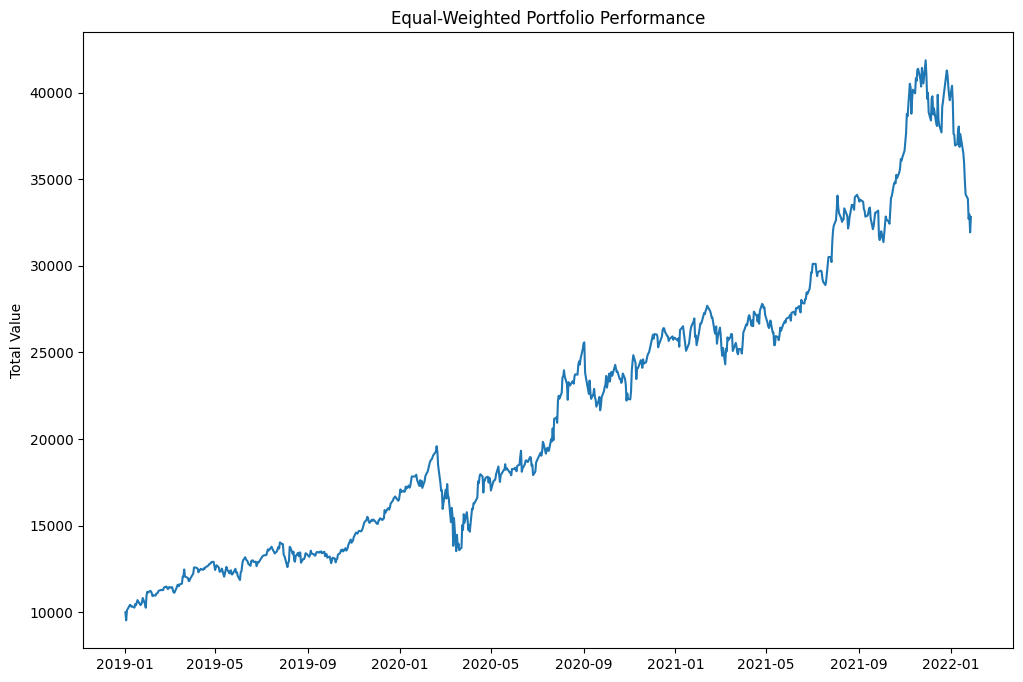

In [14]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

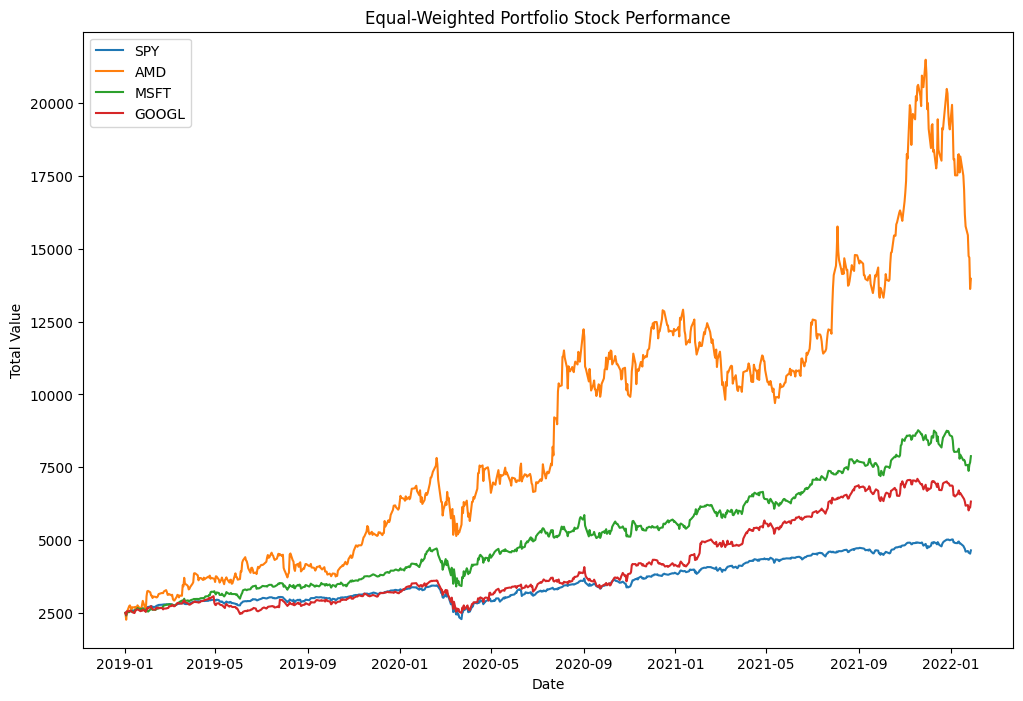

In [15]:
# View the four stocks in the portfolio
plt.figure(figsize=(12, 8))

# Plot the stock performance
for i in range(4):
    plt.plot(position_values.iloc[:, i], label =position_values.columns[i])

# Add legend
plt.legend()

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.xlabel('Date')  # You may want to add this if not already present
plt.show()

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [16]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100,2)), '%')

228.21 %


In [17]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,SPY,AMD,MSFT,GOOGL,Total,Daily Return
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2440.343231,2263.674895,2408.030265,2430.760866,9542.809257,-0.045719
2019-01-04,2522.084327,2522.570377,2520.025686,2555.443282,10120.123671,0.060497
2019-01-07,2541.970247,2731.014309,2523.239981,2550.347037,10346.571574,0.022376
2019-01-08,2565.853239,2754.912385,2541.534969,2572.747188,10435.047782,0.008551


In [18]:
# Calculate the mean Daily Return
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0017


In [19]:
# Calculate the standard deviation of Daily Return
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0204


## Sharpe Ratio
The Sharpe ratio assesses risk-adjusted returns, indicating how well an investment performs relative to its risk level. A higher Sharpe ratio signals better returns for the same risk or equivalent returns for less risk when comparing two assets against a common benchmark. Calculated by dividing the average portfolio return by its standard deviation, **we assume a negligible risk-free rate in this context**.

In [20]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.08537441782588509

In [21]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5 #252- is the assumed average working days in a year

sharpe_ratio_annualized

1.3552768673652698

## Data Preparation for Portfolio Weighting Optimization Scenarios
Before optimizing portfolio weighting scenarios, we must ready our data. This involves:

* Constructing a dictionary, named stock_adj_close, encompassing the adjusted close prices for each stock.
* Formulating another dictionary to convert daily adjusted close values into percentage changes from the previous day.

In [22]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [23]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,SPY,AMD,MSFT,GOOGL
Date,,,,
2019-01-02,230.557419,18.830000,96.023262,52.734001
2019-01-03,225.055695,17.049999,92.490768,51.273499
2019-01-04,232.594101,19.000000,96.792435,53.903500
2019-01-07,234.428040,20.570000,96.915894,53.796001
2019-01-08,236.630600,20.750000,97.618591,54.268501


In [24]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,SPY,AMD,MSFT,GOOGL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.023863,-0.094530,-0.036788,-0.027696
2019-01-04,0.033496,0.114370,0.046509,0.051294
2019-01-07,0.007885,0.082632,0.001276,-0.001994
2019-01-08,0.009395,0.008751,0.007251,0.008783


## Generate and Execute 10,000 Portfolio Scenarios
With our data prepared, the next step is to build the necessary structures for scenario generation and output storage. To accomplish this, we'll utilize the `numpy.zeros()` function, which initializes arrays filled with zeros. The initial zero-filled arrays are later replaced with the actual output values after running the scenarios. This zero-filling ensures that the arrays have the correct shape before updating them with accurate values.

Four distinct arrays will be created:

* `weights_array`: A 10,000-row, 4-column array representing the allocation weights for each stock.
* `returns_array`: An array storing the portfolio return for each scenario.
* `volatility_array`: An array holding the portfolio volatility for each scenario.
* `sharpe_array`: An array containing the Sharpe ratio for each scenario.

In [25]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [26]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [27]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios):
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))

    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)

    # Save the weights in weights_array
    weights_array[index,:] = weights

    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)

    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [28]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [29]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.44360623444574


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [30]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.517455568329024

In [31]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

2018

In [32]:
# Print the optimal weights for each stock
print(stock_symbols)
print(weights_array[index_max_sharpe,:])

['SPY', 'AMD', 'MSFT', 'GOOGL']
[0.00133196 0.31190748 0.60087662 0.08588394]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios. The optimal portfolio is where the sharpe ratio is maximised

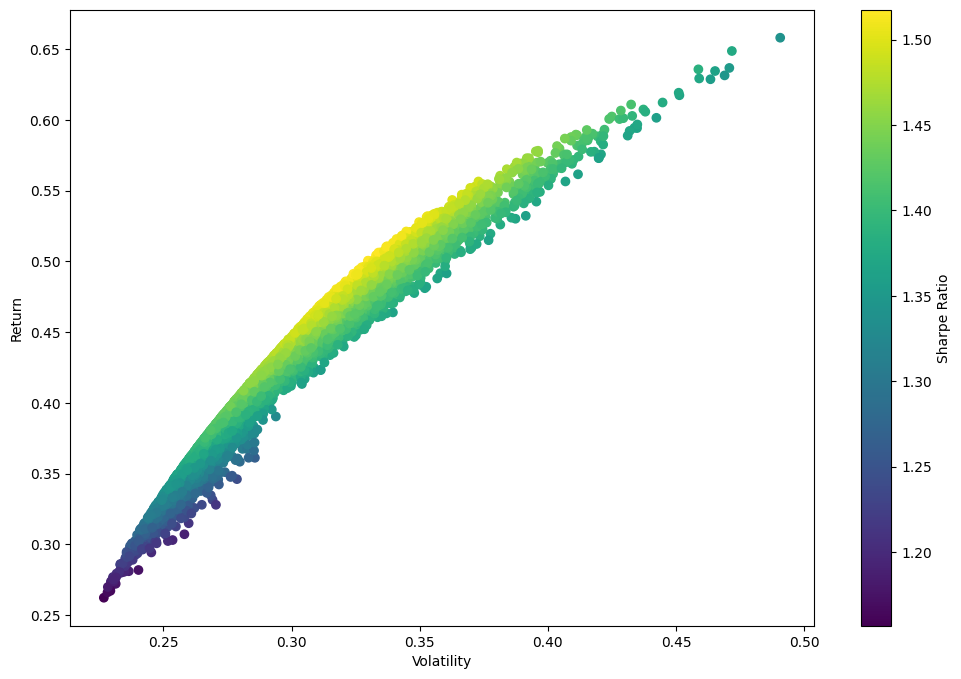

In [33]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

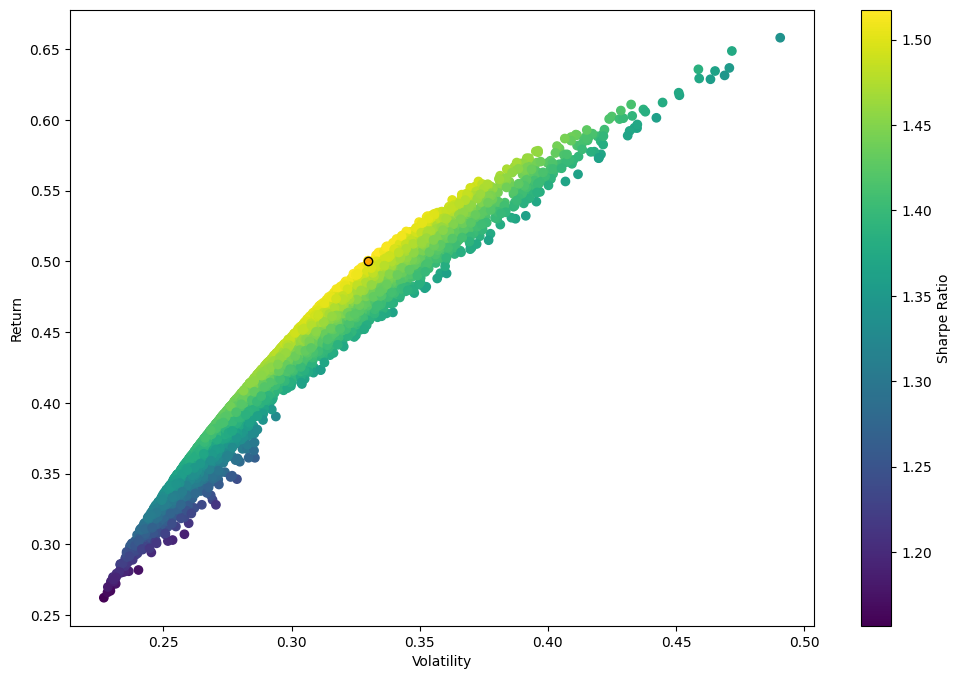

In [34]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual. This is where the sharpe ratio is maximised
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');